In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

I count 9 coins in this image


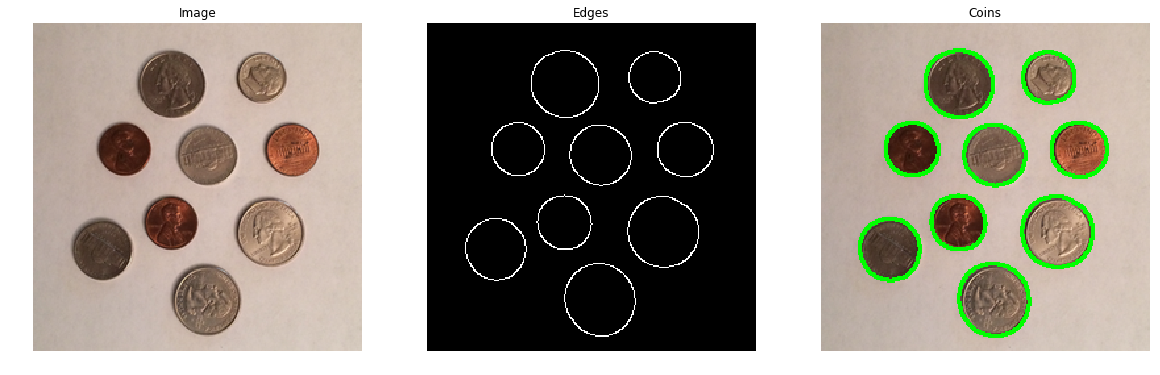

In [6]:
img = cv2.imread('images/coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (11,11), 0)

edge = cv2.Canny(blurred, 30, 150)

(_,cnts,_) = cv2.findContours(edge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("I count {} coins in this image".format(len(cnts)))
coins = img.copy()
cv2.drawContours(coins,cnts,-1,(0,255,0), 2)




plt.figure(figsize=(20,10))

plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Image'),plt.axis("off")

plt.subplot(1,3,2), plt.imshow(edge, cmap='gray')
plt.title('Edges'),plt.axis("off")

plt.subplot(1,3,3), plt.imshow(coins, cmap='gray')
plt.title('Coins'),plt.axis("off")

plt.show()








### Crop each coin

Coin#1


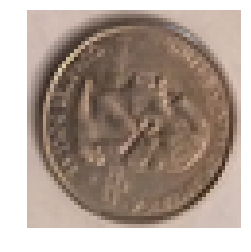

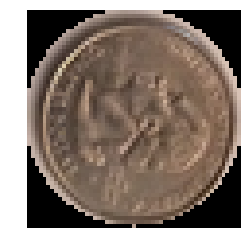

Coin#2


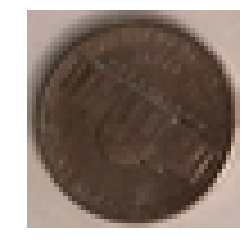

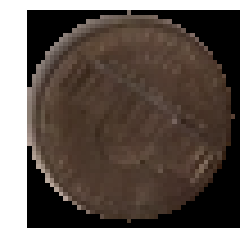

Coin#3


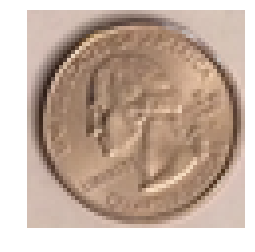

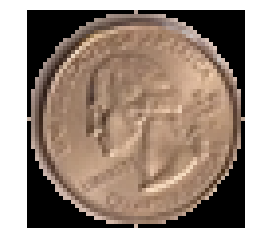

Coin#4


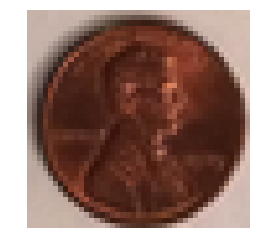

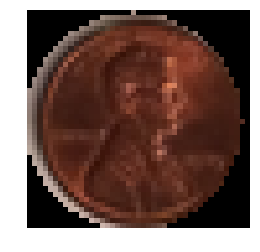

Coin#5


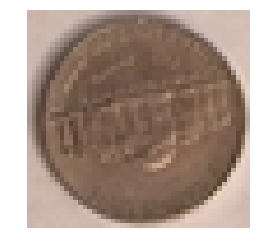

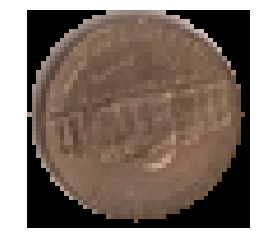

Coin#6


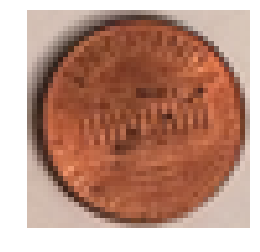

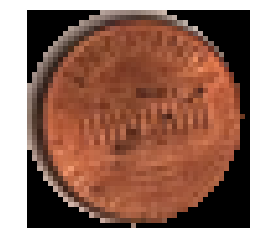

Coin#7


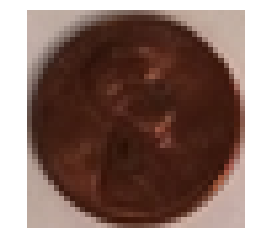

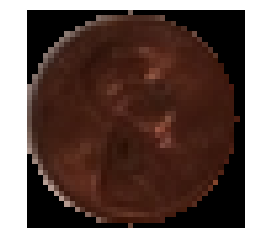

Coin#8


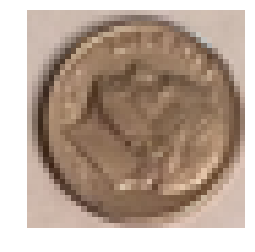

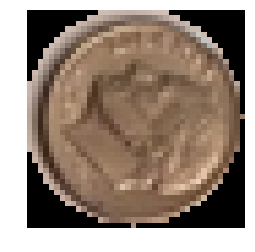

Coin#9


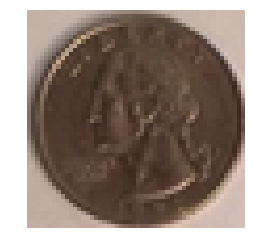

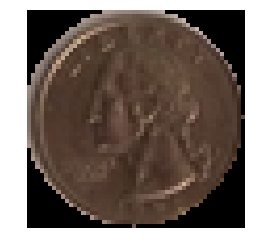

In [11]:
for (i,c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    
    print('Coin#{}'.format(i+1))
    coin = img[y:y + h, x:x +w]
    # something
    plt.imshow(coin,cmap='gray')
    plt.axis("off")
    plt.show()

    
    mask = np.zeros(img.shape[:2], dtype='uint8')
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255,-1)
    mask = mask[y:y + h, x:x +w]
    # something
    masked_coin= cv2.bitwise_and(coin,coin, mask=mask)
    plt.imshow(masked_coin,cmap='gray')
    plt.axis("off")
    plt.show()
    
        